# Content of the notebook

This notebook contains all steps that were used to create the training and test set, which we used in the paper "Prediction of Michaelis constants from structural features using deep learning".

We note that the BRENDA database is constantly changing and therefore, the dataset that is created with this notebook will be different to the dataset that we used in our paper, but all datasets that were used in the paper are available in the github repository. This notebook is divided into six steps. After each of the steps 1. to 5., we saved our dataset and stored it in the folder for datasets (named "brenda_df_checkpoint_01.pkl" - "brenda_df_checkpoint_05.pkl"). We also stored our final training, and test sets in this folder (named "test_data.pkl", "training_data.pkl"). All datasets that are newly created with this notebook, will be stored with the same filenames plus the suffix "_V2".

The location of the folder with all datasets must be changed (to the corresponding path on your PC) in the python file "directory_infomation.py" before executing this notebook.

## The notebook consists of the following steps:

1. Downloading data from BRENDA
2. Mapping data points from BRENDA to KEGG reaction IDs
3. Downloading amino acid sequences for all enzymes:
4. Calculating UniRep vectors for amino acid sequences of the enzymes
5. Adding different molecular fingerprints for the substrates and extra the features LogP, MW
6. Splitting the dataset in training and test set

Loading all the necessary packages and functions to execute the code:

In [1]:
import numpy as np
import pandas as pd
import pickle
import time
from os.path import join
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Crippen
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
import urllib.request
from zeep import Client
import hashlib


import warnings
warnings.filterwarnings('ignore')

from directory_infomation import *
from functions_for_data_preprocessing import *
#from functions_for_unirep_calculations import *

## 1. Downloading data from BRENDA

Downloading data from BRENDA can take a couple of hours.

### (a) Downloading $K_M$ values together with substrate name, UniProt ID, EC number, and organism from BRENDA

To download the data from BRENDA, a registration is needed (https://www.brenda-enzymes.org/register.php). In the following cell the password and email address has to be stored:

In [2]:
wsdl = "https://www.brenda-enzymes.org/soap/brenda_zeep.wsdl"
password = hashlib.sha256("a2b8c6".encode("utf-8")).hexdigest()
email = "alexander.kroll@hhu.de"
client = Client(wsdl)

Creating a list with all EC numbers that exist in BRENDA:

In [3]:
parameters = (email,password)
EC_numbers = client.service.getEcNumbersFromEcNumber(*parameters)
print("There exist %s different EC numbers in the BRENDA database." % len(EC_numbers))

There exist 8151 different EC numbers in the BRENDA database.


Iterating over all EC numbers and downloading all existing Km value together with the organism name, substrate name, UniProt ID, literature ID, and a comment (the amino acid sequence of the enzyme has to be downloaded separately afterwards). 

In [4]:
# create empty pandas DataFrame
brenda_df = pd.DataFrame(columns= ["EC", "KM VALUE", "SUBSTRATE", "ORGANISM", "UNIPROT" , "COMMENTARY",
                                   "LITERATURE"])

count = 0

for EC in EC_numbers:
    print(EC)
    brenda_df = add_KM_for_EC_number(brenda_df = brenda_df, EC = EC)
    if count % 100 == 0: #save the DataFrame after 100 hundred steps:
        brenda_df.to_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_KM_download_16032021.pkl"))
    time.sleep(0.2)
    count +=1
    
    
brenda_df.to_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_KM_download_16032021.pkl"))

0.0.0.0
1.1.1.1
1.1.1.10
1.1.1.100
1.1.1.101
1.1.1.102
1.1.1.103
1.1.1.104
1.1.1.105
1.1.1.106
1.1.1.107
1.1.1.108
1.1.1.109
1.1.1.11
1.1.1.110
1.1.1.111
1.1.1.112
1.1.1.113
1.1.1.114
1.1.1.115
1.1.1.116
1.1.1.117
1.1.1.118
1.1.1.119
1.1.1.12
1.1.1.120
1.1.1.121
1.1.1.122
1.1.1.123
1.1.1.124
1.1.1.125
1.1.1.126
1.1.1.127
1.1.1.128
1.1.1.129
1.1.1.13
1.1.1.130
1.1.1.131
1.1.1.132
1.1.1.133
1.1.1.134
1.1.1.135
1.1.1.136
1.1.1.137
1.1.1.138
1.1.1.139
1.1.1.14
1.1.1.140
1.1.1.141
1.1.1.142
1.1.1.143
1.1.1.144
1.1.1.145
1.1.1.146
1.1.1.147
1.1.1.148
1.1.1.149
1.1.1.15
1.1.1.150
1.1.1.151
1.1.1.152
1.1.1.153
1.1.1.154
1.1.1.155
1.1.1.156
1.1.1.157
1.1.1.158
1.1.1.159
1.1.1.16
1.1.1.160
1.1.1.161
1.1.1.162
1.1.1.163
1.1.1.164
1.1.1.165
1.1.1.166
1.1.1.167
1.1.1.168
1.1.1.169
1.1.1.17
1.1.1.170
1.1.1.171
1.1.1.172
1.1.1.173
1.1.1.174
1.1.1.175
1.1.1.176
1.1.1.177
1.1.1.178
1.1.1.179
1.1.1.18
1.1.1.180
1.1.1.181
1.1.1.182
1.1.1.183
1.1.1.184
1.1.1.185
1.1.1.186
1.1.1.187
1.1.1.188
1.1.1.189
1.1

1.14.11.51
1.14.11.52
1.14.11.53
1.14.11.54
1.14.11.55
1.14.11.56
1.14.11.57
1.14.11.58
1.14.11.59
1.14.11.6
1.14.11.60
1.14.11.61
1.14.11.62
1.14.11.63
1.14.11.64
1.14.11.65
1.14.11.66
1.14.11.67
1.14.11.68
1.14.11.69
1.14.11.7
1.14.11.70
1.14.11.71
1.14.11.72
1.14.11.73
1.14.11.74
1.14.11.75
1.14.11.8
1.14.11.9
1.14.11.B15
1.14.11.B16
1.14.11.B17
1.14.11.B18
1.14.11.B19
1.14.11.B3
1.14.12.1
1.14.12.10
1.14.12.11
1.14.12.12
1.14.12.13
1.14.12.14
1.14.12.15
1.14.12.16
1.14.12.17
1.14.12.18
1.14.12.19
1.14.12.2
1.14.12.20
1.14.12.21
1.14.12.22
1.14.12.23
1.14.12.24
1.14.12.25
1.14.12.26
1.14.12.3
1.14.12.4
1.14.12.5
1.14.12.6
1.14.12.7
1.14.12.8
1.14.12.9
1.14.13.1
1.14.13.10
1.14.13.100
1.14.13.101
1.14.13.102
1.14.13.103
1.14.13.104
1.14.13.105
1.14.13.106
1.14.13.107
1.14.13.108
1.14.13.109
1.14.13.11
1.14.13.110
1.14.13.111
1.14.13.112
1.14.13.113
1.14.13.114
1.14.13.115
1.14.13.116
1.14.13.117
1.14.13.118
1.14.13.119
1.14.13.12
1.14.13.120
1.14.13.121
1.14.13.122
1.14.13.123
1.14.1

1.16.1.10
1.16.1.2
1.16.1.3
1.16.1.4
1.16.1.5
1.16.1.6
1.16.1.7
1.16.1.8
1.16.1.9
1.16.3.1
1.16.3.2
1.16.3.3
1.16.5.1
1.16.8.1
1.16.9.1
1.16.98.1
1.17.1.1
1.17.1.10
1.17.1.11
1.17.1.2
1.17.1.3
1.17.1.4
1.17.1.5
1.17.1.6
1.17.1.7
1.17.1.8
1.17.1.9
1.17.2.1
1.17.2.2
1.17.2.3
1.17.3.1
1.17.3.2
1.17.3.3
1.17.3.4
1.17.4.1
1.17.4.2
1.17.4.3
1.17.4.4
1.17.4.5
1.17.5.1
1.17.5.2
1.17.5.3
1.17.5.B2
1.17.7.1
1.17.7.2
1.17.7.3
1.17.7.4
1.17.8.1
1.17.9.1
1.17.9.2
1.17.98.1
1.17.98.2
1.17.98.3
1.17.99.1
1.17.99.2
1.17.99.3
1.17.99.4
1.17.99.5
1.17.99.6
1.17.99.7
1.17.99.8
1.18.1.1
1.18.1.2
1.18.1.3
1.18.1.4
1.18.1.5
1.18.1.6
1.18.1.7
1.18.1.8
1.18.3.1
1.18.6.1
1.18.6.2
1.18.96.1
1.18.99.1
1.19.1.1
1.19.6.1
1.2.1.1
1.2.1.10
1.2.1.100
1.2.1.101
1.2.1.102
1.2.1.103
1.2.1.11
1.2.1.12
1.2.1.13
1.2.1.14
1.2.1.15
1.2.1.16
1.2.1.17
1.2.1.18
1.2.1.19
1.2.1.2
1.2.1.20
1.2.1.21
1.2.1.22
1.2.1.23
1.2.1.24
1.2.1.25
1.2.1.26
1.2.1.27
1.2.1.28
1.2.1.29
1.2.1.3
1.2.1.30
1.2.1.31
1.2.1.32
1.2.1.33
1.2.1.34
1.2.1.35


2.1.1.116
2.1.1.117
2.1.1.118
2.1.1.119
2.1.1.12
2.1.1.120
2.1.1.121
2.1.1.122
2.1.1.123
2.1.1.124
2.1.1.125
2.1.1.126
2.1.1.127
2.1.1.128
2.1.1.129
2.1.1.13
2.1.1.130
2.1.1.131
2.1.1.132
2.1.1.133
2.1.1.134
2.1.1.135
2.1.1.136
2.1.1.137
2.1.1.138
2.1.1.139
2.1.1.14
2.1.1.140
2.1.1.141
2.1.1.142
2.1.1.143
2.1.1.144
2.1.1.145
2.1.1.146
2.1.1.147
2.1.1.148
2.1.1.149
2.1.1.15
2.1.1.150
2.1.1.151
2.1.1.152
2.1.1.153
2.1.1.154
2.1.1.155
2.1.1.156
2.1.1.157
2.1.1.158
2.1.1.159
2.1.1.16
2.1.1.160
2.1.1.161
2.1.1.162
2.1.1.163
2.1.1.164
2.1.1.165
2.1.1.166
2.1.1.167
2.1.1.168
2.1.1.169
2.1.1.17
2.1.1.170
2.1.1.171
2.1.1.172
2.1.1.173
2.1.1.174
2.1.1.175
2.1.1.176
2.1.1.177
2.1.1.178
2.1.1.179
2.1.1.18
2.1.1.180
2.1.1.181
2.1.1.182
2.1.1.183
2.1.1.184
2.1.1.185
2.1.1.186
2.1.1.187
2.1.1.188
2.1.1.189
2.1.1.19
2.1.1.190
2.1.1.191
2.1.1.192
2.1.1.193
2.1.1.194
2.1.1.195
2.1.1.196
2.1.1.197
2.1.1.198
2.1.1.199
2.1.1.2
2.1.1.20
2.1.1.200
2.1.1.201
2.1.1.202
2.1.1.203
2.1.1.204
2.1.1.205
2.1.1.206
2

2.4.1.142
2.4.1.143
2.4.1.144
2.4.1.145
2.4.1.146
2.4.1.147
2.4.1.148
2.4.1.149
2.4.1.15
2.4.1.150
2.4.1.151
2.4.1.152
2.4.1.153
2.4.1.154
2.4.1.155
2.4.1.156
2.4.1.157
2.4.1.158
2.4.1.159
2.4.1.16
2.4.1.160
2.4.1.161
2.4.1.162
2.4.1.163
2.4.1.164
2.4.1.165
2.4.1.166
2.4.1.167
2.4.1.168
2.4.1.169
2.4.1.17
2.4.1.170
2.4.1.171
2.4.1.172
2.4.1.173
2.4.1.174
2.4.1.175
2.4.1.176
2.4.1.177
2.4.1.178
2.4.1.179
2.4.1.18
2.4.1.180
2.4.1.181
2.4.1.182
2.4.1.183
2.4.1.184
2.4.1.185
2.4.1.186
2.4.1.187
2.4.1.188
2.4.1.189
2.4.1.19
2.4.1.190
2.4.1.191
2.4.1.192
2.4.1.193
2.4.1.194
2.4.1.195
2.4.1.196
2.4.1.197
2.4.1.198
2.4.1.199
2.4.1.2
2.4.1.20
2.4.1.200
2.4.1.201
2.4.1.202
2.4.1.203
2.4.1.204
2.4.1.205
2.4.1.206
2.4.1.207
2.4.1.208
2.4.1.209
2.4.1.21
2.4.1.210
2.4.1.211
2.4.1.212
2.4.1.213
2.4.1.214
2.4.1.215
2.4.1.216
2.4.1.217
2.4.1.218
2.4.1.219
2.4.1.22
2.4.1.220
2.4.1.221
2.4.1.222
2.4.1.223
2.4.1.224
2.4.1.225
2.4.1.226
2.4.1.227
2.4.1.228
2.4.1.229
2.4.1.23
2.4.1.230
2.4.1.231
2.4.1.232
2

2.7.1.215
2.7.1.216
2.7.1.217
2.7.1.218
2.7.1.219
2.7.1.22
2.7.1.220
2.7.1.221
2.7.1.222
2.7.1.223
2.7.1.224
2.7.1.225
2.7.1.226
2.7.1.227
2.7.1.228
2.7.1.229
2.7.1.23
2.7.1.230
2.7.1.231
2.7.1.24
2.7.1.25
2.7.1.26
2.7.1.27
2.7.1.28
2.7.1.29
2.7.1.3
2.7.1.30
2.7.1.31
2.7.1.32
2.7.1.33
2.7.1.34
2.7.1.35
2.7.1.36
2.7.1.37
2.7.1.38
2.7.1.39
2.7.1.4
2.7.1.40
2.7.1.41
2.7.1.42
2.7.1.43
2.7.1.44
2.7.1.45
2.7.1.46
2.7.1.47
2.7.1.48
2.7.1.49
2.7.1.5
2.7.1.50
2.7.1.51
2.7.1.52
2.7.1.53
2.7.1.54
2.7.1.55
2.7.1.56
2.7.1.57
2.7.1.58
2.7.1.59
2.7.1.6
2.7.1.60
2.7.1.61
2.7.1.62
2.7.1.63
2.7.1.64
2.7.1.65
2.7.1.66
2.7.1.67
2.7.1.68
2.7.1.69
2.7.1.7
2.7.1.70
2.7.1.71
2.7.1.72
2.7.1.73
2.7.1.74
2.7.1.75
2.7.1.76
2.7.1.77
2.7.1.78
2.7.1.79
2.7.1.8
2.7.1.80
2.7.1.81
2.7.1.82
2.7.1.83
2.7.1.84
2.7.1.85
2.7.1.86
2.7.1.87
2.7.1.88
2.7.1.89
2.7.1.9
2.7.1.90
2.7.1.91
2.7.1.92
2.7.1.93
2.7.1.94
2.7.1.95
2.7.1.96
2.7.1.97
2.7.1.98
2.7.1.99
2.7.1.B19
2.7.1.B20
2.7.1.B26
2.7.1.B27
2.7.1.B28
2.7.1.B6
2.7.10.1
2.7.

3.1.7.10
3.1.7.11
3.1.7.12
3.1.7.2
3.1.7.3
3.1.7.4
3.1.7.5
3.1.7.6
3.1.7.7
3.1.7.8
3.1.7.9
3.1.8.1
3.1.8.2
3.1.99.B1
3.1.99.B2
3.1.99.B3
3.1.99.B4
3.1.99.B5
3.1.99.B6
3.10.1.1
3.10.1.2
3.11.1.1
3.11.1.2
3.11.1.3
3.12.1.1
3.12.1.B1
3.13.1.1
3.13.1.2
3.13.1.3
3.13.1.4
3.13.1.5
3.13.1.6
3.13.1.7
3.13.1.8
3.13.1.9
3.2.1.1
3.2.1.10
3.2.1.100
3.2.1.101
3.2.1.102
3.2.1.103
3.2.1.104
3.2.1.105
3.2.1.106
3.2.1.107
3.2.1.108
3.2.1.109
3.2.1.11
3.2.1.110
3.2.1.111
3.2.1.112
3.2.1.113
3.2.1.114
3.2.1.115
3.2.1.116
3.2.1.117
3.2.1.118
3.2.1.119
3.2.1.12
3.2.1.120
3.2.1.121
3.2.1.122
3.2.1.123
3.2.1.124
3.2.1.125
3.2.1.126
3.2.1.127
3.2.1.128
3.2.1.129
3.2.1.13
3.2.1.130
3.2.1.131
3.2.1.132
3.2.1.133
3.2.1.134
3.2.1.135
3.2.1.136
3.2.1.137
3.2.1.138
3.2.1.139
3.2.1.14
3.2.1.140
3.2.1.141
3.2.1.142
3.2.1.143
3.2.1.144
3.2.1.145
3.2.1.146
3.2.1.147
3.2.1.148
3.2.1.149
3.2.1.15
3.2.1.150
3.2.1.151
3.2.1.152
3.2.1.153
3.2.1.154
3.2.1.155
3.2.1.156
3.2.1.157
3.2.1.158
3.2.1.159
3.2.1.16
3.2.1.160
3.2.1.1

3.4.24.5
3.4.24.50
3.4.24.51
3.4.24.52
3.4.24.53
3.4.24.54
3.4.24.55
3.4.24.56
3.4.24.57
3.4.24.58
3.4.24.59
3.4.24.6
3.4.24.60
3.4.24.61
3.4.24.62
3.4.24.63
3.4.24.64
3.4.24.65
3.4.24.66
3.4.24.67
3.4.24.68
3.4.24.69
3.4.24.7
3.4.24.70
3.4.24.71
3.4.24.72
3.4.24.73
3.4.24.74
3.4.24.75
3.4.24.76
3.4.24.77
3.4.24.78
3.4.24.79
3.4.24.8
3.4.24.80
3.4.24.81
3.4.24.82
3.4.24.83
3.4.24.84
3.4.24.85
3.4.24.86
3.4.24.87
3.4.24.88
3.4.24.89
3.4.24.9
3.4.24.B10
3.4.24.B11
3.4.24.B12
3.4.24.B14
3.4.24.B15
3.4.24.B16
3.4.24.B17
3.4.24.B18
3.4.24.B19
3.4.24.B2
3.4.24.B20
3.4.24.B23
3.4.24.B24
3.4.24.B25
3.4.24.B26
3.4.24.B27
3.4.24.B28
3.4.24.B29
3.4.24.B3
3.4.24.B30
3.4.24.B33
3.4.24.B34
3.4.24.B35
3.4.24.B36
3.4.24.B37
3.4.24.B38
3.4.24.B39
3.4.24.B4
3.4.24.B40
3.4.24.B5
3.4.24.B6
3.4.24.B7
3.4.24.B8
3.4.24.B9
3.4.25.1
3.4.25.2
3.4.3.1
3.4.3.2
3.4.3.3
3.4.3.4
3.4.3.5
3.4.3.6
3.4.3.7
3.4.4.1
3.4.4.10
3.4.4.11
3.4.4.12
3.4.4.13
3.4.4.14
3.4.4.15
3.4.4.16
3.4.4.17
3.4.4.18
3.4.4.19
3.4.4.2
3.4.4.20


4.2.1.118
4.2.1.119
4.2.1.12
4.2.1.120
4.2.1.121
4.2.1.122
4.2.1.123
4.2.1.124
4.2.1.125
4.2.1.126
4.2.1.127
4.2.1.128
4.2.1.129
4.2.1.13
4.2.1.130
4.2.1.131
4.2.1.132
4.2.1.133
4.2.1.134
4.2.1.135
4.2.1.136
4.2.1.137
4.2.1.138
4.2.1.139
4.2.1.14
4.2.1.140
4.2.1.141
4.2.1.142
4.2.1.143
4.2.1.144
4.2.1.145
4.2.1.146
4.2.1.147
4.2.1.148
4.2.1.149
4.2.1.15
4.2.1.150
4.2.1.151
4.2.1.152
4.2.1.153
4.2.1.154
4.2.1.155
4.2.1.156
4.2.1.157
4.2.1.158
4.2.1.159
4.2.1.16
4.2.1.160
4.2.1.161
4.2.1.162
4.2.1.163
4.2.1.164
4.2.1.165
4.2.1.166
4.2.1.167
4.2.1.168
4.2.1.169
4.2.1.17
4.2.1.170
4.2.1.171
4.2.1.172
4.2.1.173
4.2.1.174
4.2.1.175
4.2.1.18
4.2.1.19
4.2.1.2
4.2.1.20
4.2.1.21
4.2.1.22
4.2.1.23
4.2.1.24
4.2.1.25
4.2.1.26
4.2.1.27
4.2.1.28
4.2.1.29
4.2.1.3
4.2.1.30
4.2.1.31
4.2.1.32
4.2.1.33
4.2.1.34
4.2.1.35
4.2.1.36
4.2.1.37
4.2.1.38
4.2.1.39
4.2.1.4
4.2.1.40
4.2.1.41
4.2.1.42
4.2.1.43
4.2.1.44
4.2.1.45
4.2.1.46
4.2.1.47
4.2.1.48
4.2.1.49
4.2.1.5
4.2.1.50
4.2.1.51
4.2.1.52
4.2.1.53
4.2.1.54
4

5.5.1.32
5.5.1.33
5.5.1.34
5.5.1.35
5.5.1.4
5.5.1.5
5.5.1.6
5.5.1.7
5.5.1.8
5.5.1.9
5.5.1.B6
5.5.1.B7
5.6.1.1
5.6.1.2
5.6.1.3
5.6.1.4
5.6.1.5
5.6.1.6
5.6.1.7
5.6.1.8
5.6.1.9
5.6.2.1
5.6.2.2
5.6.2.B2
5.99.1.1
5.99.1.2
5.99.1.3
5.99.1.4
6.1.1.1
6.1.1.10
6.1.1.11
6.1.1.12
6.1.1.13
6.1.1.14
6.1.1.15
6.1.1.16
6.1.1.17
6.1.1.18
6.1.1.19
6.1.1.2
6.1.1.20
6.1.1.21
6.1.1.22
6.1.1.23
6.1.1.24
6.1.1.25
6.1.1.26
6.1.1.27
6.1.1.3
6.1.1.4
6.1.1.5
6.1.1.6
6.1.1.7
6.1.1.8
6.1.1.9
6.1.1.B3
6.1.2.1
6.1.2.2
6.1.3.1
6.2.1.1
6.2.1.10
6.2.1.11
6.2.1.12
6.2.1.13
6.2.1.14
6.2.1.15
6.2.1.16
6.2.1.17
6.2.1.18
6.2.1.19
6.2.1.2
6.2.1.20
6.2.1.21
6.2.1.22
6.2.1.23
6.2.1.24
6.2.1.25
6.2.1.26
6.2.1.27
6.2.1.28
6.2.1.29
6.2.1.3
6.2.1.30
6.2.1.31
6.2.1.32
6.2.1.33
6.2.1.34
6.2.1.35
6.2.1.36
6.2.1.37
6.2.1.38
6.2.1.39
6.2.1.4
6.2.1.40
6.2.1.41
6.2.1.42
6.2.1.43
6.2.1.44
6.2.1.45
6.2.1.46
6.2.1.47
6.2.1.48
6.2.1.49
6.2.1.5
6.2.1.50
6.2.1.51
6.2.1.52
6.2.1.53
6.2.1.54
6.2.1.55
6.2.1.56
6.2.1.57
6.2.1.58
6.2.1.59
6.2.1.6


In [5]:
brenda_df = pd.read_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_KM_download_16032021.pkl"))
brenda_df

,EC,KM VALUE,SUBSTRATE,ORGANISM,UNIPROT,COMMENTARY,LITERATURE
0,1.1.1.1,0.25,(+/-)-3-methylcyclohexanone,Saccharolobus solfataricus,[],-,285621
1,1.1.1.1,9.1,(2E)-but-2-en-1-ol,Yokenella sp.,[W6CX26],"pH 8.0, 55xc2xb0C",735498
2,1.1.1.1,3.3,(2E)-but-2-enal,Yokenella sp.,[W6CX26],"pH 6.5, 65xc2xb0C",735498
3,1.1.1.1,2.4,(R)-1-indanol,Sulfolobus acidocaldarius,"[Q4J702, Q4J9F2]","pH 8.0, 65xc2xb0C",719428
4,1.1.1.1,2.4,(R)-1-indanol,Sulfolobus acidocaldarius,"[Q4J702, Q4J9F2]","65xc2xb0C, pH 8.0",719428
...,...,...,...,...,...,...,...
156382,7.6.2.9,0.0051,glycine betaine,Bacillus subtilis,[],"OpuC, without NaCl",210325
156383,7.6.2.9,0.006,glycine betaine,Bacillus subtilis,[],"OpuC, in presence of 0.4 M NaCl",210325
156384,7.6.2.9,0.0095,glycine betaine,Bacillus subtilis,[],"OpuD, without NaCl",210325
156385,7.6.2.9,0.013,glycine betaine,Bacillus subtilis,[],"OpuD, in presence of 0.4 M NaCl",210325


### (b) Only keeping data points, where the enzyme is not a mutant or recombinant and where we have a Uniprot ID for the enzyme or the organism is a bacteria:

The comments, that are downloaded together with the KM values, can contain information about the type of the enzyme (wild type, mutant, recombinant). Where possible, we extract this information and store it in the column "EnzymeType". We remove duplicated data points and data points where the enzyme is a mutant or recombinant:

In [6]:
#Get enzyme type and remove mutants and recombinants:
brenda_df["EnzymeType"] = np.nan
brenda_df.loc[pd.isnull(brenda_df["COMMENTARY"])] = ""
brenda_df["EnzymeType"][brenda_df['COMMENTARY'].str.contains("wild")] = "wild type"
brenda_df["EnzymeType"][brenda_df['COMMENTARY'].str.contains("mutant")] = "mutant"
brenda_df["EnzymeType"][brenda_df['COMMENTARY'].str.contains("recombin")] = "recombinant"
brenda_df.drop(columns = ["COMMENTARY"], inplace = True)

n_old = len(brenda_df)
brenda_df = brenda_df.loc[brenda_df["EnzymeType"] != "mutant"]
brenda_df = brenda_df.loc[brenda_df["EnzymeType"] != "recombinant"]
brenda_df.drop(columns = ["EnzymeType"], inplace = True)
print("We remove %s out of %s data points, because the enzyme is a mutant or recombinant."
      % (n_old - len(brenda_df), n_old))


#replace all KM values that contain a "-" with the mean value. Then we calculate the log10-value of all KMs:
benda_df = replace_ranges_of_KM_values_with_means(df = brenda_df)
brenda_df["log10_KM"] = [np.log10(float(KM)) for KM in brenda_df["KM VALUE"]]

#remove all duplicated points in the DataFrame:
n_old = len(brenda_df)
brenda_df = array_column_to_strings(df = brenda_df, column = "UNIPROT")
brenda_df = brenda_df.drop_duplicates(keep="first").reset_index(drop=True)
brenda_df = string_column_to_array(df = brenda_df, column = "UNIPROT")
print("We remove %s out of %s data points, because they are duplaictes."
      % (n_old - len(brenda_df), n_old))

We remove 43662 out of 156387 data points, because the enzyme is a mutant or recombinant.
We remove 1848 out of 112725 data points, because they are duplaictes.


Only keep data points where we have a Uniprot ID for the enzyme or the organism is a bacteria

In [7]:
droplist = []
for ind in brenda_df.index:
    if len(brenda_df["UNIPROT"][ind]) == 0:
        org = brenda_df["ORGANISM"][ind]
        if not is_bacteria(org):
            droplist.append(ind)
            
n_old = len(brenda_df)
brenda_df = brenda_df.drop(droplist)
print("We remove %s out of %s data points, because we neither have a UniProt ID for them nor is the organism a bacteria."
      % (n_old - len(brenda_df), n_old))

We remove 56784 out of 110877 data points, because we neither have a UniProt ID for them nor is the organism a bacteria.


If multiple entries with the same enzyme, substrate and organism exist, take the geometric mean of the KM values over these data points:

In [8]:
brenda_df = array_column_to_strings(df = brenda_df, column = "UNIPROT")
n_old = len(brenda_df)
brenda_df = brenda_df.groupby(["EC", "SUBSTRATE", "ORGANISM", "UNIPROT"], as_index= False).mean()
brenda_df = string_column_to_array(df = brenda_df, column = "UNIPROT")
print("Grouping of data points with same EC number, substrate, organism and UniProt ID, changes the number of data points from %s to %s." % (n_old , len(brenda_df)))

Grouping of data points with same EC number, substrate, organism and UniProt ID, changes the number of data points from 54093 to 39678.


Saving the created dataset:

In [9]:
#brenda_df.to_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_1_V2.pkl"))

Alternatively to executing all the steps above, our dataset can be loaded:

In [10]:
brenda_df = pd.read_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_1.pkl"))

In [11]:
brenda_df

,EC,SUBSTRATE,ORGANISM,UNIPROT,log10_KM
0,1.1.1.1,(2E)-but-2-en-1-ol,Yokenella sp.,[W6CX26],0.959041
1,1.1.1.1,(2E)-but-2-enal,Yokenella sp.,[W6CX26],0.518514
2,1.1.1.1,(R)-1-indanol,Sulfolobus acidocaldarius,"[Q4J702, Q4J9F2]",0.380211
3,1.1.1.1,(R)-2-butanol,Saccharolobus solfataricus,[P39462],-0.387216
4,1.1.1.1,(R)-2-pentanol,Saccharolobus solfataricus,[P39462],-0.657577
...,...,...,...,...,...
39673,7.6.2.9,betaine,Lactococcus lactis,[],-2.769551
39674,7.6.2.9,glycine betaine,Bacillus subtilis,[],-2.208480
39675,7.6.2.9,glycine betaine,Lactococcus lactis,[],-2.661653
39676,7.6.2.9,glycine betaine,Listeria monocytogenes,[],-2.420840


## 2. Mapping data points from BRENDA to KEGG reaction IDs

### (a) Creating a DataFrame with all KEGG Compound IDs and drug IDs and the corresponding compound names. The data to create this DataFrame is downloaded from the KEGG homepage:

To create the described DataFrames, we download data from KEGG, which can take a couple of hours. The resulting DataFrames are stored in the directory for substrate datasets and are named "KEGG_substrate_df.pkl" and "KEGG_drugs_df.pkl". To newly create this DataFrame, execute the following cell. Otherwise, load the DataFrame by executing the cell after this one.

In [12]:
#create_df_with_KEGG_CIDs_and_correpsonding_names()
#create_df_with_KEGG_drug_IDs_and_correpsonding_names()

Alternatively to creating a new DataFrame with the above cell, our existing DataFrame can be used:

In [13]:
drugs_df = pd.read_pickle(join(datasets_dir, "substrate_synonyms", "KEGG_drugs_df.pkl"))
compounds_df = pd.read_pickle(join(datasets_dir, "substrate_synonyms", "KEGG_substrate_df.pkl"))
KEGG_substrate_df = compounds_df.append(drugs_df).reset_index(drop = True)
KEGG_substrate_df.head()

,KEGG ID,substrate
0,C00001,H2O
1,C00001,Water
2,C00002,ATP
3,C00002,Adenosine 5'-triphosphate
4,C00003,NAD+


### (b) Mapping substrate names from BRENDA to KEGG Compound IDs (CIDs) with the DataFrame created/loaded in (a)

Converting all substrate names in KEGG_substrate_df and brenda_df to substrate names that only contain lower case letters:

In [14]:
KEGG_substrate_df["substrate"] = [name.lower() for name in KEGG_substrate_df["substrate"]]
brenda_df["substrate"] = [name.lower() for name in brenda_df["SUBSTRATE"]]

Mapping substrate names from brenda_df to KEGG CIDs:

In [15]:
brenda_df = brenda_df.merge(KEGG_substrate_df, on = "substrate", how = "left")
print("For %s out of %s data points we could not map the substrate name to a KEGG ID." %
      (sum(pd.isnull(brenda_df["KEGG ID"])), len(brenda_df)))

For 15353 out of 47059 data points we could not map the substrate name to a KEGG ID.


###  (c) For all the substrate names that could not be mapped to KEGG CIDs yet: We try to map them with a synonym list from PubChem to PubChem CIDs first and then to KEGG CIDs

The synonym list from PubChem can be downloaded with the following link: ftp.ncbi.nlm.nih.gov/pubchem/Compound/Extras/CID-Synonym-filtered.gz and should be stored in the folder for datasets.

We split this list with over 12 million entries in five parts because as a single file it is too big to be stored in our RAM:

In [16]:
#divivde synonym database in 5 diffeerent databases
for k in range(5):
    count = 0
    cid = []
    substrates = []
    with open(join(datasets_dir, "substrate_synonyms", "CID-Synonym-filtered")) as infile:
        for line in infile:
            count +=1
            if not (count < (k+1)*25632777 and count >=  k*25632777): 
                None
            else:
                line = line.split("\t")
                cid.append(line[0])
                substrates.append(line[1].lower()[0:-1])
                
    df = pd.DataFrame(data = {"substrates": substrates, "CID" :cid})
    df.to_pickle(join(datasets_dir, "substrate_synonyms", "substrates_synonyms_part" + str(k) + ".pkl"))

Mapping all substrate names without a KEGG CID to PubChem CIDs:

In [17]:
#creating a list with all substrate names that couldn't be mapped to KEGG IDs
unmapped_substrates = list(set(list(brenda_df["substrate"][pd.isnull(list(brenda_df["KEGG ID"]))])))
matches = substrate_names_to_Pubchem_CIDs(unmapped_substrates)

In [18]:
matches.to_pickle(join(datasets_dir, "substrate_synonyms", "Pubchem_substrate_matches.pkl"))

Mapping all PubChem CIDs to KEGG CIDs: Therefore, we create a txt-file ("Pubchem_CIDs.txt") that contains all PubChem CIDs that we want to map to KEGG CIDs:

In [19]:
#convert CIDs from strings to integers:
for ind in matches.index:
    cid = matches.loc[ind]["CID"]
    if not pd.isnull(cid):
        matches["CID"][ind] = int(cid)
        
        
#create txt file with all CIDs in matches:
CIDs = list(matches.loc[~ pd.isnull(matches["CID"])]["CID"])
f = open(join(datasets_dir, "substrate_synonyms", "Pubchem_CIDs.txt"),"w") 
for cid in CIDs:
    f.write(str(cid) + "\n")
f.close()

The txt-file "Pubchem_CIDs.txt" can be used as the input for the webservice http://csbg.cnb.csic.es/mbrole2/conversion.php to map the Pubchem CIDs to KEGG CIDs. The resulting file "mbrole_conversion.tsv" should be stored in the directory for substrate synonyms.

In [20]:
matches= pd.read_pickle(join(datasets_dir, "substrate_synonyms", "Pubchem_substrate_matches.pkl"))
matches["CID"] = [int(cid) if not pd.isnull(cid) else np.nan for cid in matches["CID"]]

#load the resulting file and store it in a DataFrame:
Pubchem_CID_to_KEGG_df = pd.read_csv(join(datasets_dir, "substrate_synonyms", "mbrole2_conversion.tsv"), sep= "\t")
#rename columns:
Pubchem_CID_to_KEGG_df.rename(columns = {"Input" : "CID", "Output" : "KEGG ID"}, inplace = True)

#merge this DataFrame with the DataFrame called matches:
macthes_with_KEGG_IDs = pd.merge(matches, Pubchem_CID_to_KEGG_df, how='left', on=['CID'])
macthes_with_KEGG_IDs.drop(columns = ["Input_source", "Output_source"], inplace = True)
macthes_with_KEGG_IDs.rename(columns = {"Metabolite" : "substrate"}, inplace = True)

macthes_with_KEGG_IDs.head()

,substrate,CID,KEGG ID
0,trnagln,NaN,NaN
1,"2-hydroxy-5,7-dimethoxy-1-naphthoate",NaN,NaN
2,"2',4',6'-trihydroxydihydrochalcone",1226045.0,NaN
3,l-aspartate beta-methyl ester,NaN,NaN
4,l-trans-alpha-crotylglycine,NaN,NaN


Mapping all newly found KEGG CIDs to substrate names in the Brenda DataFrame:

In [21]:
for ind in brenda_df.index:
    if pd.isnull(brenda_df["KEGG ID"][ind]):
        substrate = brenda_df["substrate"][ind]
        try:
            KEGG_ID = list(macthes_with_KEGG_IDs.loc[macthes_with_KEGG_IDs["substrate"]== substrate]["KEGG ID"])[0]
            brenda_df["KEGG ID"][ind] = KEGG_ID
        except:
            None

Removing all data points with substrates without a KEGG ID:

In [22]:
n_old = len(brenda_df)
brenda_df = brenda_df.loc[~pd.isnull(brenda_df["KEGG ID"])]
print("We remove %s out of %s data points, because we couldn't find a KEGG ID for the substrate."
      % (n_old - len(brenda_df), n_old))

We remove 12533 out of 47059 data points, because we couldn't find a KEGG ID for the substrate.


### (d) Mapping  data points to KEGG reaction IDs

Loading DataFrame with all reactions in the KEGG reaction database:

In [24]:
KEGG_reaction_df = pd.read_pickle(datasets_dir + "KEGG_reaction_df.pkl")
KEGG_reaction_df.head()

,EC number,KEGG reaction ID,substrates left,substrates right,KEGG IDs left,KEGG IDs right
0,1.1.1.1,R00623,Primary alcohol + NAD+,Aldehyde + NADH + H+,"[C00226, C00003]","[C00071, C00004, C00080]"
1,1.1.1.1,R00624,Secondary alcohol + NAD+,Ketone + NADH + H+,"[C01612, C00003]","[C01450, C00004, C00080]"
2,1.1.1.1,R00754,Ethanol + NAD+,Acetaldehyde + NADH + H+,"[C00469, C00003]","[C00084, C00004, C00080]"
3,1.1.1.1,R02124,Retinol + NAD+,Retinal + NADH + H+,"[C00473, C00003]","[C00376, C00004, C00080]"
4,1.1.1.1,R02878,1-Octanol + NAD+,1-Octanal + NADH + H+,"[C00756, C00003]","[C01545, C00004, C00080]"


Mapping the BRENDA data points to KEGG reaction IDs via EC number and KEGG CID:

In [25]:
brenda_df["KEGG reaction ID"] = np.nan
for ind in brenda_df.index:
    reaction_ids = map_BRENDA_entry_to_KEGG_reaction_ID(brenda_df.loc[ind], KEGG_reaction_df)
    if not reaction_ids is None:
        brenda_df["KEGG reaction ID"][ind] = reaction_ids

Removing all data points without a KEGG reaction ID:

In [26]:
n_old = len(brenda_df)
brenda_df = brenda_df.loc[~pd.isnull(brenda_df["KEGG reaction ID"])]
print("We remove %s out of %s data points, because we couldn't find a reaction ID for these data points." 
      % (n_old - len(brenda_df), n_old))

We remove 18342 out of 34526 data points, because we couldn't find a reaction ID for these data points.


Saving the created DataFrame:

In [27]:
#brenda_df.to_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_2_V2.pkl"))

Alternatively to executing all the steps above, our dataset can be loaded:

In [28]:
brenda_df = pd.read_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_2.pkl"))

## 3. Downloading amino acid sequences for all enzymes:

### (a) If we have a Uniprot ID for the enzyme, we use the UniProt mapping service to get the amino acid sequence

Creating a text file with all all Uniprot IDs in our DataFrame:

In [29]:
IDs = []
for ind in brenda_df.index:
    if len(brenda_df["UNIPROT"][ind]) != 0:
        IDs = IDs + list(brenda_df["UNIPROT"][ind])
    
f = open(join(datasets_dir, "enzyme_data", "UNIPROT_IDs.txt"),"w") 
for ID in list(set(IDs)):
    f.write(str(ID) + "\n")
f.close()

We map the Uniprot IDs to amino acid sequences via the UniProt mapping service (https://www.uniprot.org/uploadlists/). The result is stored in a csv-file:

In [30]:
brenda_df["Sequence"] = np.nan

UNIPROT_df = pd.read_csv(join(datasets_dir, "enzyme_data", "UNIPROT_results.csv"), sep = ";")

for ind in brenda_df.index:
    if len(brenda_df["UNIPROT"][ind]) != 0:
        UNIPROT_list = brenda_df["UNIPROT"][ind]
        for ID in UNIPROT_list:
            try:
                brenda_df["Sequence"][ind] = list(UNIPROT_df["Sequence"].loc[UNIPROT_df["UNIPROT ID"] == ID])[0]
            except: None

### (b) Download the amino acid sequence from BRENDA (via EC number and name of organism) if no UniProt ID is available or if we couldn't find a amino acid sequence for a UniProt ID:

In [31]:
wsdl = "https://www.brenda-enzymes.org/soap/brenda_zeep.wsdl"
password = hashlib.sha256("a2b8c6".encode("utf-8")).hexdigest()
email = "alexander.kroll@hhu.de"
client = Client(wsdl)

In [32]:
data = brenda_df.loc[pd.isnull(brenda_df["Sequence"])]

EC_org_df = pd.DataFrame(data = {"EC" : data["EC"], "ORGANISM" : data["ORGANISM"]})
EC_org_df = EC_org_df.drop_duplicates(keep = "first").reset_index(drop = True)
print("There exist %s different EC number-organism combinations in the DataFrame for which we need an amino acid sequence." 
      % len(EC_org_df))

There exist 4793 different EC number-organism combinations in the DataFrame for which we need an amino acid sequence.


Download the missing amino acid sequences:

In [33]:
EC_org_df["Sequence"] = np.nan

for ind in EC_org_df.index:
    org = EC_org_df["ORGANISM"][ind]
    EC = EC_org_df["EC"][ind]
    if not pd.isnull(EC) and not pd.isnull(org):
        parameters = ("alexander.kroll@hhu.de",password,"ecNumber*" + str(EC), "sequence*", "noOfAminoAcids*",
                      "firstAccessionCode*", "source*", "id*", "organism*" + str(org))

        resultString = download_data_from_BRENDA(function = client.service.getSequence,
                                            parameters = parameters, error_identifier = EC +";" +org,
                                           print_error = True)
        if resultString != [] and resultString is not None:
            EC_org_df["Sequence"][ind] = resultString[0]["sequence"]
    time.sleep(0.5)
    
EC_org_df.to_pickle(join(datasets_dir, "enzyme_data", "EC_org_df_with_sequences_from_brenda.pkl"))

Mapping the newly found sequences to our DataFrame brenda_df:

In [34]:
EC_org_df = pd.read_pickle(join(datasets_dir, "enzyme_data", "EC_org_df_with_sequences_from_brenda.pkl"))

for ind in brenda_df.index:
    if pd.isnull(brenda_df["Sequence"][ind]):
        EC = brenda_df["EC"][ind]
        org = brenda_df["ORGANISM"][ind]
        help_df = EC_org_df.loc[EC_org_df["EC"] == EC]
        help_df = help_df.loc[help_df["ORGANISM"]== org]
        if len(help_df) > 0:
            brenda_df["Sequence"][ind] = list(help_df["Sequence"])[0]

Remove all data points without an amino acid sequence:

In [35]:
n_old = len(brenda_df)
brenda_df = brenda_df.loc[~pd.isnull(brenda_df["Sequence"])]
print("We remove %s out of %s data points, because of missing amino acid sequences" % (n_old - len(brenda_df), n_old))

We remove 3660 out of 16184 data points, because of missing amino acid sequences


Saving the created DataFrame:

In [36]:
#brenda_df.to_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_3_V2.pkl"))

Alternatively to executing all the steps above, our dataset can be loaded:

In [37]:
brenda_df = pd.read_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_3.pkl"))

## 4. Calculating UniRep vectors for amino acid sequences of the enzymes

To calculate the UniRep vectors, we use code that is copied from Martin Enqvist's github repository (https://github.com/EngqvistLab/UniRep50). Enqvist's code relies on the UniRep representation created by George Church's group (https://github.com/churchlab/UniRep)

To calculate the UniRep vectors, we need to store all sequences in a FASTA-file:

In [48]:
ofile = open(join(datasets_dir, "enzyme_data", "all_sequences.fasta"), "w")
for ind in brenda_df.index:
    seq = brenda_df["Sequence"][ind]
    if not pd.isnull(seq):
        seq_end = seq.find("#")
        ofile.write(">" + str(ind) + "\n" +seq[:seq_end] + "\n")
ofile.close()

#### <span style="color:red">Attetntion: Calculating the UniRep vectors requires tensorflow version 1.15.0 (in compariosn to the Graph Neural Network, for which tensorflow 2 is required). Also calculating the UniRep vectors takes a lot of time if tensorflow is not running on GPU.</span>

In [38]:
X_unirep = compute_unirep_representations(fasta_file = join(datasets_dir, "enzyme_data", "all_sequences.fasta"),
                                          rep_file = join(datasets_dir, "enzyme_data", "unirep_representations.tsv"))

Adding the UniRep vectors to the brenda_df DataFrame:

In [39]:
Unirep_df = pd.read_csv(join(datasets_dir, "enzyme_data", "unirep_representations.tsv"), sep = "\t")
brenda_df = add_Unirep_vector(brenda_df, Unirep_df)
brenda_df.head()

,EC,SUBSTRATE,ORGANISM,UNIPROT,log10_KM,substrate,KEGG ID,KEGG reaction ID,Sequence,Unirep
26,1.1.1.1,1-Octanol,Geobacillus thermodenitrificans,"[A4IP64, A4ISB9]",0.588832,1-octanol,C00756,[R02878_f],MQNFTFRNPTKLIFGRGQIEQLKEEVPKYGKKVLLVYGGGSIKRNG...,"[0.022512827000000003, 0.13417156, 0.13952683,..."
27,1.1.1.1,1-Octanol,Homo sapiens,"[P00326, P08319]",-0.408935,1-octanol,C00756,[R02878_f],MGTKGKVIKCKAAIAWEAGKPLCIEEVEVAPPKAHEVRIQIIATSL...,"[0.035504497999999995, 0.11922091, 0.09867405,..."
114,1.1.1.1,NAD+,Acetobacter pasteurianus,[],-0.659379,nad+,C00003,"[R00623_f, R00624_f, R00754_f, R02124_f, R0287...",MFAMRLHQPKTPLQWEEVPDPVPGPGEIRVKVLACGVCRTDLHVVD...,"[0.020893178999999998, 0.042431805, 0.0817914,..."
115,1.1.1.1,NAD+,Aeropyrum pernix,[Q9Y9P9],-3.000000,nad+,C00003,"[R00623_f, R00624_f, R00754_f, R02124_f, R0287...",MKAARLHEYNKPLRIEDVDYPRLEGRFDVIVRIAGAGVCHTDLHLV...,"[0.025469791000000002, 0.056665923, 0.10528523..."
117,1.1.1.1,NAD+,Euglena gracilis,[B8QU18],-0.704468,nad+,C00003,"[R00623_f, R00624_f, R00754_f, R02124_f, R0287...",MKAAVVEQFGKPLAIREVPVPEPGYGQVLIKIIASGVCHTDLHVRD...,"[0.022199258, 0.06320289, 0.11042938, -0.01751..."


Saving the created DataFrame

In [40]:
#brenda_df.to_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_4_V2.pkl"))

Alternatively to executing all the steps above, our dataset can be loaded:

In [41]:
brenda_df = pd.read_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_4.pkl"))

## 5. Adding different molecular fingerprints for the substrates and extra the features LogP, MW

ECFPs, molecular weight (MW) and LogP are calculated from an MDL Molfile of the substrate. The following function downloads Molfiles for all KEGG CIDs and stores them in the directory for datasets in the subfolder named "mol-files". This can take up to a couple of hours.

In [42]:
download_mol_files()

Folder for mol-files already exitsts. If you want to download all mol-files again, first remove the current folder.


Calculating the Morgan-, RDKit-, and MACCS-Fingerints and the molewcular weight and LogP-coefficient for every substrate with an MDL Molfile as the input:

In [43]:
brenda_df["MW"] = np.nan
brenda_df["LogP"] = np.nan
brenda_df["ECFP"] = ""
brenda_df["RDKit FP"] = ""
brenda_df["MACCS FP"] = ""

for ind in brenda_df.index:
    kegg_id = brenda_df["KEGG ID"][ind]
    if not pd.isnull(kegg_id):
        try:
            mol = Chem.MolFromMolFile(datasets_dir +  "/mol-files/" + kegg_id + '.mol')
        except OSError:
            None
        if mol is not None:
            ecfp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024).ToBitString()
            rdkit_fp = Chem.RDKFingerprint(mol).ToBitString()
            maccs_fp = MACCSkeys.GenMACCSKeys(mol).ToBitString()
            
            brenda_df["ECFP"][ind] = ecfp
            brenda_df["RDKit FP"][ind] = rdkit_fp
            brenda_df["MACCS FP"][ind] = maccs_fp
            
            brenda_df["MW"][ind] = Descriptors.ExactMolWt(mol)
            brenda_df["LogP"][ind] = Crippen.MolLogP(mol)

Saving the dataset:

In [44]:
#brenda_df.to_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_5_V2.pkl"))

Alternatively to executing all the steps above, our dataset can be loaded:

In [45]:
brenda_df = pd.read_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_5.pkl"))

## 6. Splitting the dataset in training and test set

Before splitting the data in training and test set, we log10-transform the $K_M$ value and we take mean of these transformed values for data points with the same enzyme representation and the same substrate fingerprints:

In [46]:
n_old = len(brenda_df)

# To take the mean, we have to convert the Unirep vectors into strings:
brenda_df = array_column_to_strings(df = brenda_df, column = "Unirep")
#taking the mean:
brenda_df = brenda_df.groupby(["KEGG ID", "Unirep", "ECFP", "RDKit FP", "MACCS FP"]).mean().reset_index()
#Convert Unirep vectors back to arrays
brenda_df = string_column_to_array(df = brenda_df, column = "Unirep")

print("The size of the data set changed from %s to %s data points, because we took the geometric mean of the KM values if we have multiple values for the same enzyme-substrate combination."
      % (n_old , len(brenda_df)))
brenda_df

The size of the data set changed from 12524 to 11737 data points, because we took the geometric mean of the KM values if we have multiple values for the same enzyme-substrate combination.


,KEGG ID,Unirep,ECFP,RDKit FP,MACCS FP,log10_KM,MW,LogP
0,C00002,"[-0.00011314545, 0.103980064, 0.1426562, -0.02...",0000000001000000000000000000000000000000000000...,1010111010101011101011111000111010011100100111...,0000000000000000000000000000010000000010000100...,0.986772,506.995745,-1.6290
1,C00002,"[-0.00011789875, 0.20878185, 0.19384588, -0.01...",0000000001000000000000000000000000000000000000...,1010111010101011101011111000111010011100100111...,0000000000000000000000000000010000000010000100...,-1.040959,506.995745,-1.6290
2,C00002,"[-0.00058936706, 0.017352361, 0.071628265, -0....",0000000001000000000000000000000000000000000000...,1010111010101011101011111000111010011100100111...,0000000000000000000000000000010000000010000100...,-0.764472,506.995745,-1.6290
3,C00002,"[-0.0006067396, 0.025546094, 0.08274606, 0.009...",0000000001000000000000000000000000000000000000...,1010111010101011101011111000111010011100100111...,0000000000000000000000000000010000000010000100...,-1.048455,506.995745,-1.6290
4,C00002,"[-0.0008920353999999999, 0.12853655, 0.1322941...",0000000001000000000000000000000000000000000000...,1010111010101011101011111000111010011100100111...,0000000000000000000000000000010000000010000100...,0.732394,506.995745,-1.6290
...,...,...,...,...,...,...,...,...
11732,C22128,"[0.006564933, 0.019262753, 0.23506917, -0.0216...",0000000000000100000000100000000001001000000000...,1000010010101010000010011001001000010001011000...,0000000000000000000000000000000000000000000000...,-0.507240,622.444469,4.3248
11733,C22180,"[0.0020483762, 0.08818631, 0.11527183, -0.0259...",0000000010000101000000000001000000000000000000...,1110010010101110100111111011001010100011111011...,0000000000000000000000000000000000000000000000...,-1.537602,831.197041,-3.2261
11734,C22181,"[0.0020483762, 0.08818631, 0.11527183, -0.0259...",0000000010000101000000000001000000000000000000...,1110010010101110100111111011001010100011111011...,0000000000000000000000000000000000000000000000...,-1.408935,993.249864,-5.7112
11735,C22182,"[0.0020483762, 0.08818631, 0.11527183, -0.0259...",0000000010000100000000000000000000000000000000...,1110010010101110100111111011001010100011111011...,0000000000000000000000000000000000000000000000...,-0.809668,1155.302687,-8.1963


Splitting data in 80 % training data and 20 % test data:

In [47]:
seed = 42
brenda_df = brenda_df.sample(frac =1, random_state= seed)

n_old = len(brenda_df)
#removing unrealsitc outliers:
brenda_df = brenda_df.loc[brenda_df["log10_KM"]> -5]
brenda_df = brenda_df.loc[brenda_df["log10_KM"]< 4]

print("We remove %s out of %s data points, because they are outliers."
      % (n_old - len(brenda_df), n_old))

brenda_df.reset_index(drop = True, inplace = True)

y = np.array(brenda_df["log10_KM"])

bins = np.linspace(min(y)+1.5, max(y)-1.5, 10)
y_binned = np.digitize(y, bins)
X_train, X_test, y_train, y_test = train_test_split(brenda_df, y_binned, test_size=0.2, stratify=y_binned, random_state=seed)

We remove 15 out of 11737 data points, because they are outliers.


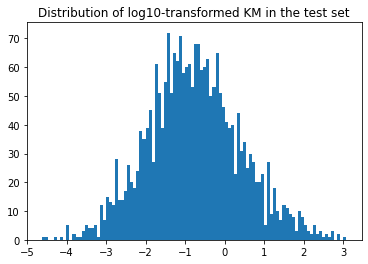

-0.7734556149216331

In [48]:
plt.hist(np.array(X_test["log10_KM"]), bins = 100)
plt.title("Distribution of log10-transformed KM in the test set")
plt.show()
np.mean(X_test["log10_KM"])

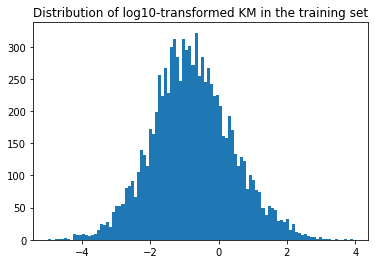

-0.7676345542934437

In [49]:
plt.hist(np.array(X_train["log10_KM"]), bins = 100)
plt.title("Distribution of log10-transformed KM in the training set")
plt.show()
np.mean(X_train["log10_KM"])

In [50]:
#X_test.to_pickle(join(datasets_dir, "splits", "test_data_V2.pkl"))
#X_train.to_pickle(join(datasets_dir, "splits", "training_data_V2.pkl"))

Splitting the training set into 5-folds for Cross-Validation:

In [51]:
skf = StratifiedKFold(n_splits=5, random_state = seed)

y = np.array(X_train["log10_KM"])
bins = np.linspace(min(y)+1.5, max(y)-1.5, 10)
y_binned = np.digitize(y, bins)


CV_indices_train = []
CV_indices_test = []
for train_index, test_index in skf.split(X = X_train, y = np.reshape(y_binned, (-1,1))):
    CV_indices_train.append(train_index)
    CV_indices_test.append(test_index)

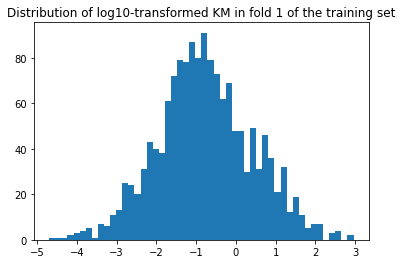

-0.7705379477687612


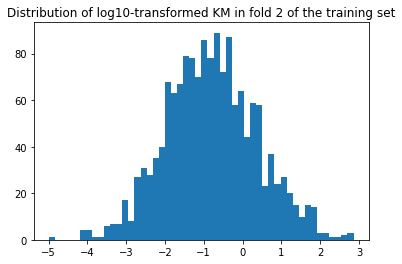

-0.7962050436468505


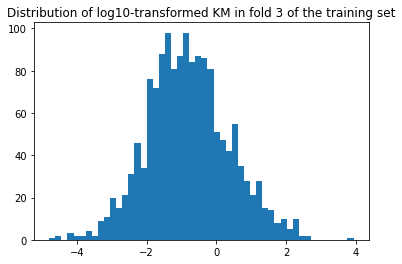

-0.8051762761955414


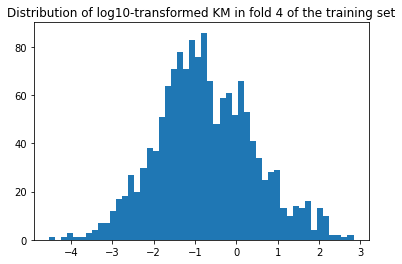

-0.7407883549910025


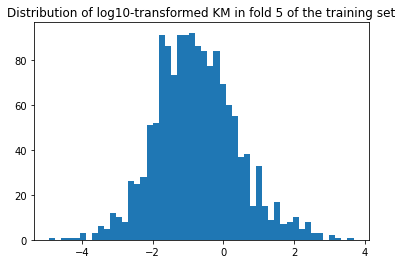

-0.7547338443051678


In [52]:
for i in range(5):
    index_list = [True if ind in list(CV_indices_test[i]) else False for ind in X_train.index]
    plt.hist(np.array(X_train["log10_KM"].loc[index_list]), bins = 50)
    plt.title("Distribution of log10-transformed KM in fold %s of the training set" % (i+1))
    plt.show()
    print(np.mean(X_train["log10_KM"][index_list]))

In [53]:
with open(join(datasets_dir, "splits", "CV_indices_test"), 'wb') as fp:
    pickle.dump(CV_indices_test, fp)
    
with open(join(datasets_dir, "splits", "CV_indices_train"), 'wb') as fp:
    pickle.dump(CV_indices_train, fp)

### Adding type of organism for all data points in the test set:

In [ ]:
brenda_df = pd.read_pickle(join(datasets_dir, "BRENDA_data", "brenda_df_checkpoint_4.pkl"))
brenda_df = array_column_to_strings(df = brenda_df, column = "Unirep")

brenda_test = pd.read_pickle(join(datasets_dir, "splits", "test_data_V2.pkl"))
brenda_test = array_column_to_strings(df = brenda_test, column = "Unirep")


brenda_test["Organism"] = np.nan
brenda_test["Organism_type"] = np.nan

for ind in brenda_test.index:
    Unirep = brenda_test["Unirep"][ind]
    help_df = brenda_df.loc[brenda_df["Unirep"] == Unirep]
    if len(help_df) > 0:
        brenda_test["Organism"][ind] = list(help_df["ORGANISM"])[0]
        
    try:
        org = brenda_test["Organism"][ind]
        tax_id = ncbi.get_name_translator([org])[org][0]
        lineage = ncbi.get_lineage(tax_id)
        brenda_test["Organism_type"][ind] =  list(ncbi.get_taxid_translator(lineage).values())[1]
    except KeyError: pass
brenda_test = string_column_to_array(df = brenda_test, column = "Unirep")
brenda_test.to_pickle(join(datasets_dir, "splits", "test_data_V2_with_organism_type.pkl"))